## Summary Information 
<a id="top"></a>

In this notebook, we will introduce a series of simulation groups -- the survey strategy simulation families -- and add some additional information describing these families. This includes a description what was changed in the survey strategy variation in that group *and* consolidates some high-level summary statistics from MAF that may aid your analysis of how those survey strategy changes are influencing your metrics. 

* <a href="#List of families">List of families</a>
* <a href="#General overview">General pointers</a>
* <a href="#subnightly timescales">Intranight variations</a>
 * <a href='#visit time'>visit_time (v1.5)</a>
 * <a href="#u long">u_long (v1.7)</a>
 * <a href="#intranight">intranight (v1.5)</a>
 * <a href="#pair_times">pair_times (v1.7)</a>
 * <a href="#twilight_pairs">twilight_pairs (v1.7)</a>
* <a href="#wfd fraction and filters">WFD Fraction and Filter Balance</a>
 * <a href="#wfd_depth">wfd_depth (v1.5)</a>
 * <a href="#filter_dist">filter_dist (v1.5)</a>
* <a href="#footprint options">Survey footprint variations</a><br>
 * <a href="#footprint">footprint (v1.5)</a>
 * <a href="#footprint_tune">footprint_tune (v1.7)</a>
* <a href="#cadence variations">Long timescale cadence variations</a>
 * <a href='#filter_cadence'>filter_cadence (v1.7)</a>
 * <a href="#rolling">rolling (v1.7)</a>
* <a href="#mini-surveys">Mini-mini-survey variations</a>
 * <a href="#twilight_neo">twilight_neo (v1.7)</a>
 * <a href="#shortexp">shortexp (v1.5)</a>
 * <a href="#dcr">dcr (v1.5)</a>
 * <a href="#good_seeing">good_seeing (v1.5)</a>
 * <a href="#spiders">spiders (v1.5)</a>
* <a href="#DDF variations">DDF sequence and dither variations</a>
 * <a href="#ddf">ddf (v1.5)</a>
 * <a href="#ddf_dithers">ddf_dithers (v1.7)</a>
 * <a href="#euclid_dithers">euclid_dithers (v1.7)</a>
* <a href="#potential schedulers">Strategy combinations in 'potential schedulers' (v1.6)</a>
 * <a href="#potential_schedulers">potential_schedulers (v1.6)</a>



In [1]:
%matplotlib inline

In [2]:
# Import our family dictionaries/comments 
# The information in FamilyInfo provides dictionaries to isolate each family group for easier comparison
# A demonstration of more general use of this tool is available at 
# https://github.com/lsst-pst/survey_strategy/blob/master/fbs_1.7/Demo_FamilyInfo.ipynb
import run_infos as ri

families = ri.FamilyInfo()
# Read the summary statistics for all runs
families.read_summary_csv(csv_file='all_summaries_2021_02_09.csv')

<a id='List of families'></a>

### List of families 

Which family groups should be considered together and implement a given change in survey strategy?
Note that we have dropped some families from earlier releases and replaced them with updated versions.

In [3]:
family_list = families.list_of_families()

**visit_time**, with 3 simulations.<br>**u_long**, with 5 simulations.<br>**intranight**, with 9 simulations.<br>**pair_times**, with 6 simulations.<br>**twilight_pairs**, with 5 simulations.<br>**wfd_depth**, with 17 simulations.<br>**filter_dist**, with 8 simulations.<br>**footprint**, with 19 simulations.<br>**footprint_tune**, with 10 simulations.<br>**filter_cadence**, with 7 simulations.<br>**rolling**, with 25 simulations.<br>**twilight_neo**, with 8 simulations.<br>**shortexp**, with 5 simulations.<br>**dcr**, with 7 simulations.<br>**good_seeing**, with 6 simulations.<br>**spiders**, with 2 simulations.<br>**ddf**, with 4 simulations.<br>**ddf_dithers**, with 9 simulations.<br>**euclid_dithers**, with 6 simulations.<br>**potential_schedulers**, with 17 simulations.<br>

For 178 simulations in all.


<a id="general overview"></a>

## In general:

Unless otherwise noted: 
* Visits are always 1x30s or 2x15s. For v1.5 and v1.6, the default is 1x30s. For v1.7, the default is 2x15s. The 1x30s simulations achieve about 2.2M visits over 10 years. The 2x15s visits achieve about 2.0M visits. We used 1x30s visits in the earlier simulations but unfortunately are realizing that we absolutely must plan for 2x15s in the overall strategy at this time, so all further simulations will be based on 2x15s visits.
* Pairs of visits in each night are in two filters as follows: u-g, u-r, g-r, r-i, i-z, z-y or y-y. Pairs are scheduled for approximately 22 minutes separation. Almost every visit in gri has another visit within 50 minutes.
* The survey footprint is the standard baseline footprint, with 18K square degrees in the WFD reaching from -62 to +2 degrees (excluding the galactic plane), with additional coverage for the North Ecliptic Spur (NES), the Galactic Plane (GP) and South Celestial Pole (SCP). Five DD fields are included, with the fifth field being composed of two pointings covering the Euclid Deep Field - South (EDF-S), and we allocate 5% of the total survey time to the DD fields. 
* The standard balance of visits between filters is 6% in *u*, 9% in *g*, 22% in *r*, 22% in *i*, 20% in *z*, and 21 % in *y*. 
* *u* band is loaded in and out of the filter holder at 40% lunar illumination (corresponding to approximately new moon +/- 6 nights). 

As a quick way to approach 'decoding' a simulation run name: The name always starts with the family, followed by some encoding of how that particular run has implemented some survey strategy variation, followed by the release version (v1.5 or v1.6 for example), and ending with `_10yrs.db`. 
For example: `goodseeing_i_v1.5_10yrs.db` is from the `good seeing` family and contains at least one visit per year in i band ensured to be acquired in good seeing, and it is from v1.5.
`footprint_gpsmoothv1.5_10yrs.db` is from the `footprint` family in v1.5, and the variation on the survey footprint is that the Galactic Plane is covered at the same depth as the WFD. To decode the particular details of the survey strategy variation, it will likely be necessary to look further at the description of the family in the release notes or in the information below. 

<a id="subnightly timescales"></a> 
<a href="#top">Back to top</a>

## Variations on sub-nightly timescales

<a id='visit time'></a>

In [4]:
families.family_info('visit_time')

**visit_time** = simulations bearing on the length of the individual visits. This demonstrates the impact of 1x30s vs. 2x15s visits (9% more visits). The variable exposure run allows the exposure time per visit to vary between 20-100 seconds to attempt to hold the single image visit depth roughly constant, but results in slightly fewer visits overall (although more visits per pointing within the WFD).

Comparison run: baseline_v1.5_10yrs


,Area with >825 visits/pointing,Unextincted area i>25.9,Nvisits total,Median Nvisits over best 18k,Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band,Briefly
baseline_v1.5_10yrs,18217.707863,15236.536835,2224095.0,967.0,60.0,86.0,205.0,207.0,185.0,195.0,1x30s
baseline_2snaps_v1.5_10yrs,17996.134341,15087.981860,2056927.0,892.0,55.0,79.0,189.0,190.0,170.0,181.0,2x15s
var_expt_v1.5_10yrs,18576.086249,15417.824263,2099047.0,1048.0,57.0,82.0,194.0,195.0,172.0,183.0,1xVariable


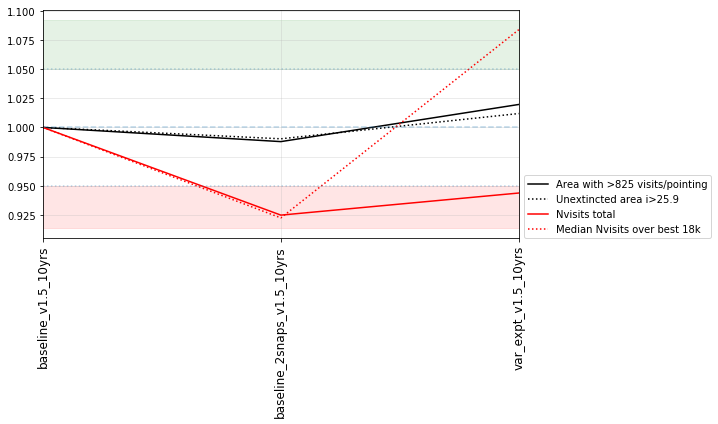

In [5]:
families.plot_areaNvis('visit_time')

<a id="u long"></a>

In [6]:
families.family_info('u_long')

**u_long** = simulations bearing on the length of the u-band exposure time. These simulations swap a single exposure per visit of variable length for each visit in *u* band. The number of *u* band visits is left unchanged, resulting in a shift of visits from other filters to compensate for the increase in time. (Note the DDF visits were left unchanged at 2x15s each).<br>
There is an additional u_long simulation in v1.5 called `u60_v1.5_10yrs`; the u60 v1.5 simulation uses 2x30s u band visits but cuts the number of visits in half rather than maintaining the number of u-band visits as the family below does. Halving u visits was a no-go for transient science (shown in the TDE metric), and so is dropped here. 

Comparison run: baseline_nexp2_v1.7_10yrs


,Area with >825 visits/pointing,Unextincted area i>25.9,Nvisits total,Median Nvisits over best 18k,Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band,Briefly
baseline_nexp2_v1.7_10yrs,17982.705642,15174.429105,2045493.0,888.0,55.0,79.0,189.0,190.0,170.0,180.0,u 2x15s
u_long_ms_30_v1.7_10yrs,18091.813816,15186.179216,2080376.0,904.0,58.0,80.0,192.0,193.0,173.0,182.0,u 1x30s
u_long_ms_40_v1.7_10yrs,17973.473412,15118.196431,2046486.0,889.0,55.0,79.0,189.0,190.0,170.0,180.0,u 1x40s
u_long_ms_50_v1.7_10yrs,18138.814260,15095.535503,2015389.0,929.0,53.0,77.0,186.0,187.0,167.0,178.0,u 1x50s
u_long_ms_60_v1.7_10yrs,18112.796157,15011.606138,1986422.0,915.0,51.0,76.0,183.0,184.0,166.0,175.0,u 1x60s


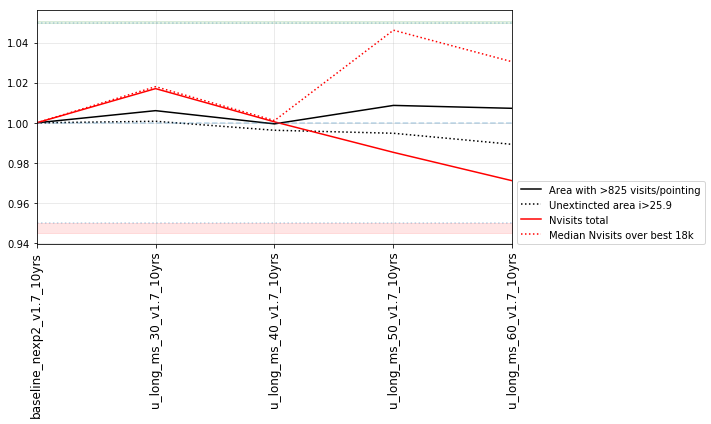

In [7]:
families.plot_areaNvis('u_long')

<a id="intranight"></a>

In [8]:
families.family_info('intranight')

**intranight** = simulations bearing on the distribution of visits within a night. Snaps per visit (2x15s vs 1x30s) is included for completeness, but the other simulations include variations on whether visits are in the same or mixed filters, and the effect of devoting a fraction of time to obtaining an additional (third) visit per night. <br>
In the `third_obs` simulations, we add a third visit per night to augment the pairs of visits, by adding a *g*, *r*, *i* or *z* visit at the end of the night in the WFD. The amount of the night dedicated to obtaining this third visit at the end of the night varies across the family, from 15 minutes to 120 minutes (corresponding to covering approximately one blob to about five, or half of the night's pairs receiving a third visit). We find the third visit decreases the amount of sky imaged in each night and has an accompanying negative impact on metrics which prefer more sky area within a given time (such as solar system discovery and slower transient metrics, such as SNIa) -- the amount of this impact varies from negligible to noticeable depending on how much time is allocated to the third visit.

Comparison run: baseline_v1.5_10yrs


,Area with >825 visits/pointing,Unextincted area i>25.9,Nvisits total,Median Nvisits over best 18k,Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band,Briefly
baseline_2snaps_v1.5_10yrs,17996.134341,15087.981860,2056927.0,892.0,55.0,79.0,189.0,190.0,170.0,181.0,2x15s visits mixed filters
baseline_v1.5_10yrs,18217.707863,15236.536835,2224095.0,967.0,60.0,86.0,205.0,207.0,185.0,195.0,1x30s visits mixed filters
baseline_samefilt_v1.5_10yrs,18304.155108,15317.948319,2310613.0,1003.0,71.0,88.0,210.0,210.0,190.0,196.0,1x30s visits same filter
third_obs_pt15v1.5_10yrs,18217.707863,15236.536835,2224095.0,967.0,60.0,86.0,205.0,207.0,185.0,195.0,third visits for 15 min
third_obs_pt30v1.5_10yrs,18208.475633,15244.090478,2224730.0,967.0,60.0,86.0,206.0,207.0,185.0,196.0,third visits for 30 min
third_obs_pt45v1.5_10yrs,18222.743625,15257.519176,2225855.0,968.0,59.0,86.0,206.0,207.0,185.0,196.0,third visits for 45 min
third_obs_pt60v1.5_10yrs,18216.029276,15274.305049,2228508.0,969.0,59.0,87.0,206.0,207.0,185.0,196.0,third visits for 60 min
third_obs_pt90v1.5_10yrs,18217.707863,15261.715645,2235263.0,973.0,60.0,87.0,207.0,208.0,186.0,197.0,third visits for 90 min
third_obs_pt120v1.5_10yrs,18235.333030,15264.233525,2240627.0,975.0,59.0,87.0,206.0,208.0,186.0,197.0,third visits for 120 min


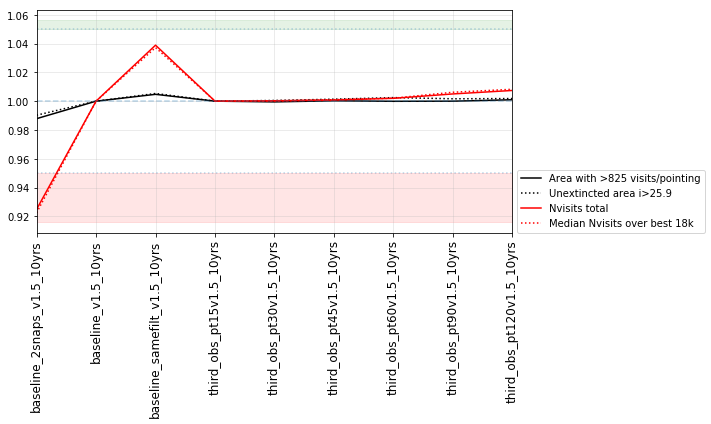

In [9]:
families.plot_areaNvis('intranight')

<a id="pair_times"></a>

In [10]:
families.family_info('pair_times')

**pair_times** = these simulations explore the impact of varying the time between pairs of visits in a night. Varying the pair time changes the overall number of filter changes per night, so longer pair times result in more visits overall in the survey. Longer pair times are more vulnerable to interruption however, resulting in a lower fraction of visits occuring in pairs. This family is related to the intranight family, but is from v1.7 so must be considered separately. The standard baseline attempts pairs at 22 minutes.

Comparison run: baseline_nexp2_v1.7_10yrs


,Area with >825 visits/pointing,Unextincted area i>25.9,Nvisits total,Median Nvisits over best 18k,Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band,Briefly
pair_times_11_v1.7_10yrs,14356.957095,15118.196431,1947985.0,845.0,51.0,74.0,180.0,181.0,162.0,173.0,11 minute pairs
pair_times_22_v1.7_10yrs,17982.705642,15174.429105,2045493.0,888.0,55.0,79.0,189.0,190.0,170.0,180.0,22 minute pairs (baseline)
pair_times_33_v1.7_10yrs,18076.706531,15145.893121,2075493.0,902.0,57.0,80.0,192.0,192.0,172.0,182.0,33 minute pairs
pair_times_44_v1.7_10yrs,18104.403221,15112.321376,2089977.0,909.0,59.0,81.0,193.0,194.0,173.0,183.0,44 minute pairs
pair_times_55_v1.7_10yrs,18108.599689,15072.874574,2100189.0,913.0,59.0,82.0,194.0,194.0,173.0,183.0,55 minute pairs
baseline_nexp2_v1.7_10yrs,17982.705642,15174.429105,2045493.0,888.0,55.0,79.0,189.0,190.0,170.0,180.0,Baseline


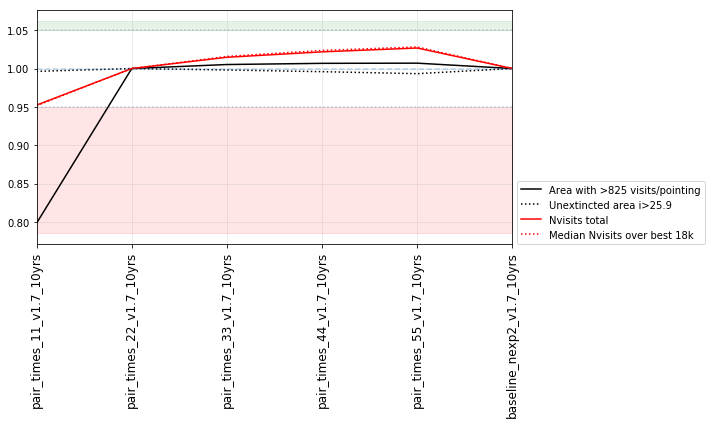

In [11]:
families.plot_areaNvis('pair_times')

<a id="twilight_pairs"></a>

In [12]:
families.family_info('twilight_pairs')

**twilight_pairs** = explore the effect of programming twilight observing in pairs, rather than single visits. The baseline chooses visits during twilight (-18 to -12 degrees solar altitude) one at a time using a greedy algorithm. This family programs visits during twilight in pairs, similarly to the remainder of the night but with a shorter return interval of 15 minutes. In some simulations, visits during morning twilight are preferentially chosen to be areas of the sky already observed earlier in the night. Depending on the simulation, pairs are taken in the same filter (r+r, i+i, z+z, or y+y), or mixed filters (r+i, i+z, z+y or y+y).

Comparison run: baseline_nexp2_v1.7_10yrs


,Area with >825 visits/pointing,Unextincted area i>25.9,Nvisits total,Median Nvisits over best 18k,Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band,Briefly
baseline_nexp2_v1.7_10yrs,17982.705642,15174.429105,2045493.0,888.0,55.0,79.0,189.0,190.0,170.0,180.0,Baseline (greedy)
twi_pairs_v1.7_10yrs,17989.419991,15220.590256,2054798.0,892.0,54.0,78.0,190.0,191.0,171.0,181.0,Twi pairs same filter
twi_pairs_mixed_v1.7_10yrs,17914.722857,15208.840145,2038077.0,885.0,54.0,78.0,188.0,192.0,168.0,180.0,Twi pairs mixed filters
twi_pairs_repeat_v1.7_10yrs,18001.170102,15211.358026,2056507.0,893.0,54.0,78.0,190.0,191.0,171.0,182.0,"Twi pairs same filter, repeat area"
twi_pairs_mixed_repeat_v1.7_10yrs,17937.383785,15215.554494,2039770.0,886.0,54.0,78.0,188.0,192.0,168.0,180.0,"Twi pairs mixed filters, repeat area"


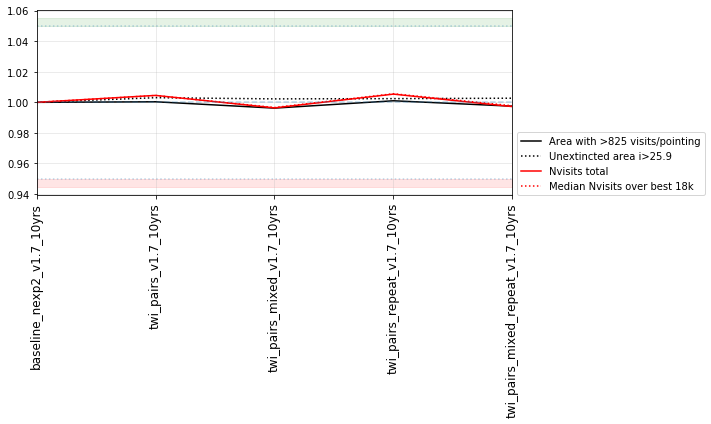

In [13]:
families.plot_areaNvis('twilight_pairs')

<a id="wfd fraction and filters"></a>
<a href="#top">Back to top</a>

## Variations on WFD time and filters 

<a id="wfd_depth"></a>

In [14]:
families.family_info('wfd_depth')

**wfd_depth** = evaluates the impact of scaling the fraction of survey time devoted to WFD (and thus the number of visits per pointing in the WFD) up or down. For metrics which respond simply to number of visits, this is a useful family to demonstrate that effect. Metrics which require coverage outside the WFD but are still sensitive to number of visits will show more complicated behavior as coverage in the NES and GP is reduced or increased. When the DDF fields are present, they are allocated 5% of the available survey time.<br>
 From these simulations we determined that between 1.65 and 1.7M visits  are required to cover 18K square degrees of the standard WFD to a minimum number of visits of 825 per pointing; some of the range in that required number of visits comes from over and under subscription in some parts of the sky, which leads to unevenness in coverage. 

Comparison run: baseline_v1.5_10yrs


,Area with >825 visits/pointing,Unextincted area i>25.9,Nvisits total,Median Nvisits over best 18k,Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band,Briefly
baseline_v1.5_10yrs,18217.707863,15236.536835,2224095.0,967.0,60.0,86.0,205.0,207.0,185.0,195.0,Baseline
wfd_depth_scale0.65_noddf_v1.5_10yrs,13596.557052,15357.395120,2227379.0,842.0,56.0,81.0,179.0,180.0,161.0,168.0,65% no DDF
wfd_depth_scale0.70_noddf_v1.5_10yrs,18556.782496,15422.860024,2227429.0,864.0,57.0,83.0,186.0,188.0,168.0,174.0,70% no DDF
wfd_depth_scale0.75_noddf_v1.5_10yrs,18324.298156,15448.038834,2226780.0,899.0,60.0,84.0,195.0,196.0,175.0,182.0,75% noDDF
wfd_depth_scale0.80_noddf_v1.5_10yrs,18268.065482,15475.735524,2226618.0,938.0,60.0,85.0,199.0,200.0,179.0,189.0,80% no DDF
wfd_depth_scale0.85_noddf_v1.5_10yrs,18295.762172,15467.342588,2226787.0,978.0,61.0,88.0,208.0,209.0,187.0,198.0,85% no DDF
wfd_depth_scale0.90_noddf_v1.5_10yrs,18382.209417,15309.555382,2225486.0,1016.0,63.0,91.0,217.0,217.0,195.0,205.0,90% no DDF
wfd_depth_scale0.95_noddf_v1.5_10yrs,18468.656663,15281.019398,2225655.0,1057.0,64.0,94.0,226.0,227.0,203.0,214.0,95% noDDF
wfd_depth_scale0.99_noddf_v1.5_10yrs,18514.817813,15298.644565,2226029.0,1093.0,65.0,97.0,235.0,236.0,210.0,221.0,99% no DDF
wfd_depth_scale0.65_v1.5_10yrs,5629.142478,15189.536391,2225715.0,805.0,54.0,77.0,170.0,171.0,154.0,160.0,65%


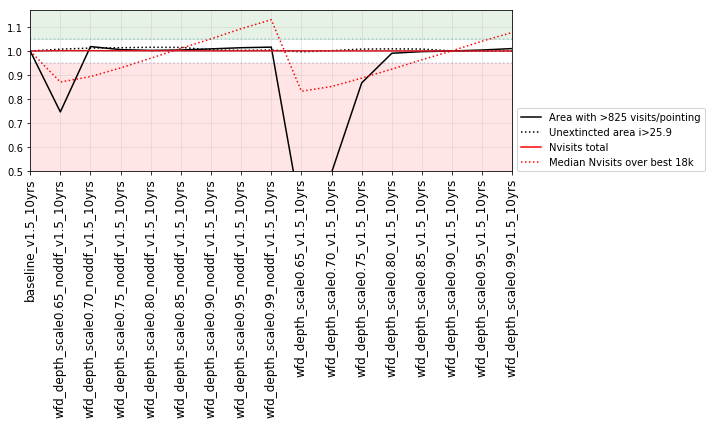

In [15]:
families.plot_areaNvis('wfd_depth')

<a id='filter_dist'></a>

In [16]:
families.family_info('filter_dist')

**filter_dist** = evaluate the impact of changing the balance of visits between filters. Note that this family uses a simplified footprint that is a simple stripe of Declination corresponding to the traditional WFD declination limits but no NES or SCP and continuing WFD over the GP. Generally we find transients and variable stars metrics favor bluer distributions of filters while solar system and galaxy metrics prefer redder distributions of filters (particularly *i* band). <br>  ** the comparison run for this family is NOT the baseline, but rather one of the filter_dist family, to avoid differences due to the footprint change. 

Comparison run: filterdist_indx2_v1.5_10yrs


,Area with >825 visits/pointing,Unextincted area i>25.9,Nvisits total,Median Nvisits over best 18k,Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band,Briefly
filterdist_indx1_v1.5_10yrs,19897.134447,14304.920889,2220872.0,1056.0,164.0,173.0,174.0,175.0,177.0,185.0,Uniform
filterdist_indx2_v1.5_10yrs,19907.205971,15253.322708,2224340.0,1058.0,68.0,99.0,230.0,231.0,207.0,215.0,Baseline-like
filterdist_indx4_v1.5_10yrs,19886.223630,14974.677218,2221366.0,1057.0,166.0,91.0,206.0,205.0,188.0,195.0,u heavy
filterdist_indx3_v1.5_10yrs,19913.920320,14922.641012,2223700.0,1057.0,65.0,197.0,208.0,203.0,185.0,192.0,g heavy
filterdist_indx6_v1.5_10yrs,19918.116788,15382.573929,2230654.0,1061.0,61.0,89.0,208.0,311.0,189.0,195.0,i heavy
filterdist_indx5_v1.5_10yrs,19919.795375,15153.446764,2231204.0,1061.0,57.0,79.0,183.0,184.0,271.0,281.0,z and y heavy
filterdist_indx7_v1.5_10yrs,19908.884558,15126.589368,2221595.0,1056.0,99.0,127.0,214.0,214.0,194.0,202.0,Bluer
filterdist_indx8_v1.5_10yrs,19908.884558,15244.929772,2226710.0,1059.0,62.0,90.0,207.0,229.0,227.0,236.0,Redder


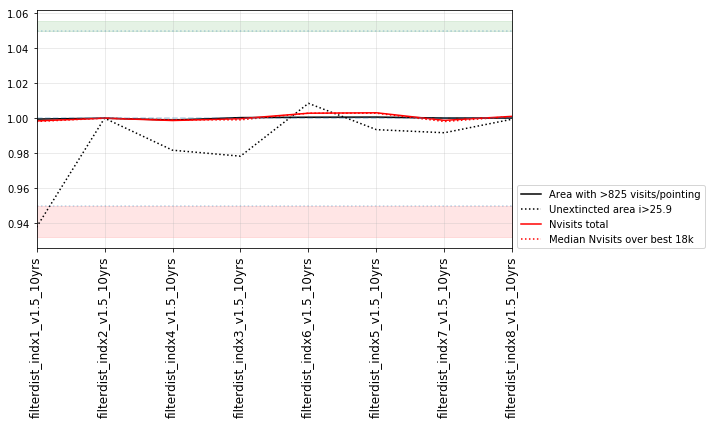

In [17]:
families.plot_areaNvis('filter_dist')

<a id="footprint options"></a>
<a href="#top">Back to top</a>

## Variations on the survey footprint

<a id="footprint"></a>

In [18]:
families.family_info('footprint')

**footprint** = an initial large set of simulations exploring widely different options for the overall survey footprint. The fraction of time devoted to the WFD will necessarily vary among these simulations; this is one of the parameters suitable for later fine-tuning. All runs in this family use 1x30s visits. Some of these footprints contain a traditional WFD footprint, while others contain a shifted/extended N/S footprint that sometimes includes a dust extinction limit around the galactic plane and sometimes a simple galactic latitude cutoff; the bulges family is included because without significant galactic bulge coverage metrics related to MW populations fell significantly, yet the time requirement to cover all of the relevant areas together must be considered.

Comparison run: baseline_v1.5_10yrs


,Area with >825 visits/pointing,Unextincted area i>25.9,Nvisits total,Median Nvisits over best 18k,Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band,Briefly
filterdist_indx2_v1.5_10yrs,19907.205971,15253.322708,2224340.0,1058.0,68.0,99.0,230.0,231.0,207.0,215.0,no nes
baseline_v1.5_10yrs,18217.707863,15236.536835,2224095.0,967.0,60.0,86.0,205.0,207.0,185.0,195.0,standard baseline
footprint_standard_goalsv1.5_10yrs,18205.957752,15244.090478,2224155.0,966.0,60.0,86.0,205.0,207.0,185.0,196.0,standard baseline again
footprint_bluer_footprintv1.5_10yrs,18208.475633,14954.534170,2222665.0,967.0,61.0,175.0,206.0,202.0,144.0,151.0,bluer filters
footprint_no_gp_northv1.5_10yrs,18077.545824,15246.608359,2224065.0,976.0,60.0,87.0,208.0,209.0,187.0,198.0,no GP N extension
footprint_gp_smoothv1.5_10yrs,20096.886335,15184.500629,2223753.0,908.0,58.0,82.0,194.0,195.0,174.0,185.0,GP at WFD level
footprint_add_mag_cloudsv1.5_10yrs,18541.675210,15408.592032,2224333.0,953.0,59.0,85.0,203.0,204.0,183.0,194.0,add MagClouds
footprint_big_sky_dustv1.5_10yrs,18038.938317,17631.880899,2226702.0,961.0,56.0,84.0,205.0,206.0,184.0,192.0,"big sky, dust-no GP"
footprint_big_skyv1.5_10yrs,18034.741848,16730.479524,2232598.0,1022.0,65.0,92.0,218.0,219.0,196.0,209.0,big sky - no GP
footprint_big_sky_nouiyv1.5_10yrs,18079.224411,16705.300714,2233224.0,1045.0,66.0,94.0,223.0,229.0,201.0,214.0,"big sky - no GP, no uiy"


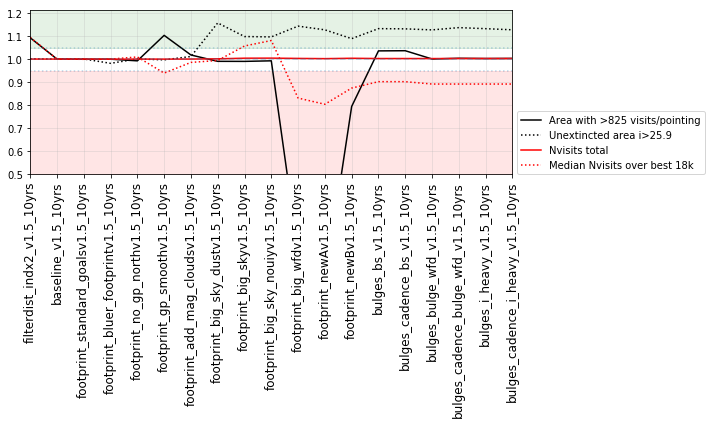

In [19]:
families.plot_areaNvis('footprint')

<a id="footprint_tune"></a>

In [20]:
families.family_info('footprint_tune')

**footprint_tune** = a further exploration of the survey footprint, exploring options for improving the basic setup used in v1.6 in the 'combo_dust' simulation. We feel combo_dust had a lot of promise, as it improved metrics for a wide range of science without impacting metrics (currently avaialable in MAF) dramatically. However, combo_dust had some issues, especially in terms of contingency available in the WFD area (in case of exceptionally bad weather, it could fail SRD, and as it was only one run, it did not offer variations to attempt to improve MWLV or TVS science, for example). This footprint_tune family offers additional variations on the combo_dust (shifted WFD with dust-extinction-limits) simulation. Generally the WFD here is a dust-extinction limited footprint, but with variable N/S limits. We vary the coverage on the remaining sky. Because this is a v1.7 run, it cannot be compared directly with the footprint family above. (they use 2x15s visits, not 1x30s). 

Comparison run: baseline_nexp2_v1.7_10yrs


,Area with >825 visits/pointing,Unextincted area i>25.9,Nvisits total,Median Nvisits over best 18k,Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band,Briefly
baseline_nexp2_v1.7_10yrs,17982.705642,15174.429105,2045493.0,888.0,55.0,79.0,189.0,190.0,170.0,180.0,Traditional footprint
footprint_0_v1.710yrs,15390.966866,16492.959422,2046219.0,853.0,52.0,72.0,177.0,178.0,163.0,173.0,WFD -70.2<dec<7.8 + north ring
footprint_1_v1.710yrs,16478.691430,16503.030946,2045718.0,861.0,53.0,75.0,183.0,184.0,164.0,175.0,WFD -70.2<dec<7.8
footprint_2_v1.710yrs,16863.927213,16476.173549,2046100.0,867.0,53.0,76.0,184.0,185.0,166.0,176.0,WFD -67.4<dec<8
footprint_3_v1.710yrs,16103.527171,16377.136899,2045273.0,857.0,53.0,75.0,182.0,183.0,164.0,174.0,WFD -67.4<dec8 + 20deg bridge
footprint_4_v1.710yrs,17478.290162,15428.735080,2041709.0,884.0,55.0,78.0,187.0,188.0,169.0,180.0,WFD -62.5<dec<3.6 +33deg bridge
footprint_5_v1.710yrs,16103.527171,16377.136899,2045273.0,857.0,53.0,75.0,182.0,183.0,164.0,174.0,WFD -67.4<dec<8 + 20deg bridge (like 3)
footprint_6_v1.710yrs,16080.866242,16438.405335,2044789.0,856.0,53.0,75.0,182.0,183.0,163.0,174.0,WFD -67.4<dec<8 + 20deg bridge (south)
footprint_7_v1.710yrs,16880.713086,16601.228302,2046775.0,871.0,53.0,76.0,184.0,185.0,166.0,177.0,WFD -70.2<dec<7.8 no ecliptic in galaxy
footprint_8_v1.710yrs,15986.026060,17413.664551,2050183.0,860.0,52.0,74.0,182.0,182.0,163.0,173.0,WFD -70.2<dec<7.8 no galactic


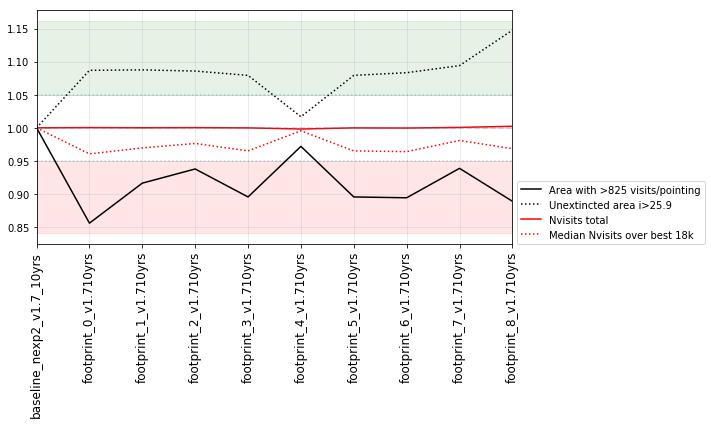

In [21]:
families.plot_areaNvis('footprint_tune')

<a id="cadence variations"></a>
<a href="#top">Back to top</a>

## Variations on cadence on long timescales

<a id='filter_cadence'></a>

In [22]:
families.family_info('filter_cadence')

**filter_cadence** = investigate the impact of reducing the gaps between g band visits over the month, (essentially down-weighting the lunar cycle by adding a requirement that fields receive visits in g band filter throughout each month). In order to avoid 'long gaps' in g band coverage, additional fill-in visits in g are requested in each night; there is a limit to the number of fill-in visits in each night allowed, and these fill-in visits can be requested as contiguous blobs or non-contiguous pointings. The goal is to improve transient discovery for longer timescale transients which require bluer filter coverage (like SN).

Comparison run: baseline_nexp2_v1.7_10yrs


,Area with >825 visits/pointing,Unextincted area i>25.9,Nvisits total,Median Nvisits over best 18k,Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band,Briefly
baseline_nexp2_v1.7_10yrs,17982.705642,15174.429105,2045493.0,888.0,55.0,79.0,189.0,190.0,170.0,180.0,Baseline
cadence_drive_gl30v1.7_10yrs,17905.490627,15188.697097,2034144.0,883.0,55.0,79.0,189.0,189.0,168.0,178.0,"Add g, limit 30/night, non-contiguous"
cadence_drive_gl30_gcbv1.7_10yrs,17954.169658,15219.750962,2040531.0,886.0,54.0,80.0,190.0,189.0,169.0,178.0,"Add g, limit 30/night, contiguous"
cadence_drive_gl100v1.7_10yrs,17820.721969,15176.107693,2027623.0,881.0,53.0,83.0,190.0,186.0,167.0,176.0,"Add g, limit 100/night, non-contiguous"
cadence_drive_gl100_gcbv1.7_10yrs,17946.616016,15190.375685,2042087.0,887.0,53.0,85.0,192.0,187.0,167.0,177.0,"Add g, limit 100/night, contiguous"
cadence_drive_gl200v1.7_10yrs,17753.578477,14972.159337,2021571.0,883.0,45.0,116.0,191.0,177.0,158.0,168.0,"Add g, limit 200/night, non-contiguous"
cadence_drive_gl200_gcbv1.7_10yrs,17996.973634,14996.498853,2046411.0,893.0,46.0,115.0,194.0,179.0,160.0,170.0,"Add g, limit 200/night, contiguous"


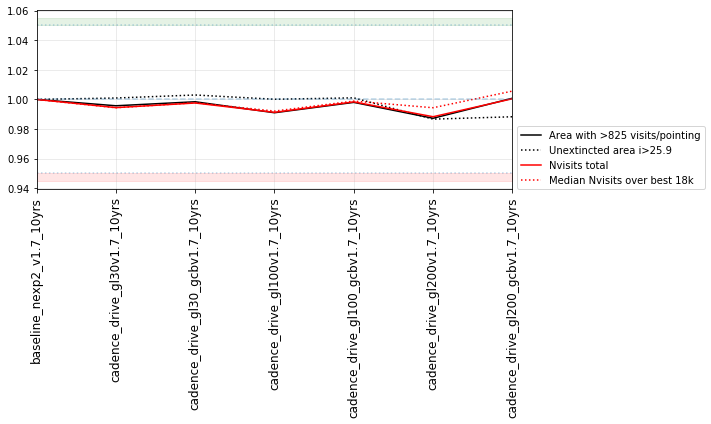

In [23]:
families.plot_areaNvis('filter_cadence')

<a id="rolling"></a>

In [24]:
families.family_info('rolling')

**rolling** = Add a rolling cadence, where some parts of the sky receive a higher number of visits during an 'on' season, followed by a lower number of visits during an 'off' season. During the first year and half, and the last year and half (or so), the sky is covered uniformly as normal. This 'intro' and 'outro' allows for better proper motion coverage, and is 1.5 years instead of 1 to allow the entire sky to receive even coverage during that period. This leaves 6 years for 'rolling'; simulations either split the sky into 2 or 3 declination-based regions which are covered either every other season or every third season. Each of the active regions is actually composed of 2 sub-section in the North and South, to spread follow-up requirements over the sky. Some simulations add an every-other nightly modulation between this northern and southern sub-section; some do not although this may happen to some extent due to 'blob' coverage.

Comparison run: baseline_nexp2_v1.7_10yrs


,Area with >825 visits/pointing,Unextincted area i>25.9,Nvisits total,Median Nvisits over best 18k,Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band,Briefly
baseline_nexp2_v1.7_10yrs,17982.705642,15174.429105,2045493.0,888.0,55.0,79.0,189.0,190.0,170.0,180.0,Baseline
rolling_nm_scale0.2_nslice2_v1.7_10yrs,17938.223079,15145.893121,2038323.0,885.0,55.0,78.0,188.0,189.0,169.0,180.0,"No Modulation, 0.2 strength, 2 band"
rolling_nm_scale0.4_nslice2_v1.7_10yrs,17914.722857,15134.143010,2038633.0,885.0,55.0,78.0,188.0,189.0,169.0,180.0,"No Modulation, 0.4 strength, 2 band"
rolling_nm_scale0.6_nslice2_v1.7_10yrs,17945.776722,15116.517844,2039563.0,886.0,55.0,78.0,188.0,189.0,169.0,180.0,"No Modulation, 0.6 strength, 2 band"
rolling_nm_scale0.8_nslice2_v1.7_10yrs,17951.651777,15127.428661,2040254.0,886.0,55.0,78.0,188.0,189.0,170.0,180.0,"No Modulation, 0.8 strength, 2 band"
rolling_nm_scale0.9_nslice2_v1.7_10yrs,17958.366127,15063.642344,2041138.0,887.0,55.0,78.0,189.0,189.0,169.0,180.0,"No Modulation, 0.9 strength, 2 band"
rolling_nm_scale1.0_nslice2_v1.7_10yrs,17919.758619,15079.588924,2042025.0,887.0,55.0,78.0,188.0,189.0,170.0,180.0,"No Modulation, 1.0 strength, 2 band"
rolling_nm_scale0.2_nslice3_v1.7_10yrs,17909.687095,15174.429105,2037930.0,885.0,55.0,78.0,188.0,189.0,170.0,180.0,"No Modulation, 0.2 strength, 3 band"
rolling_nm_scale0.4_nslice3_v1.7_10yrs,17929.830143,15120.714312,2039088.0,886.0,55.0,78.0,188.0,189.0,169.0,180.0,"No Modulation, 0.4 strength, 3 band"
rolling_nm_scale0.6_nslice3_v1.7_10yrs,17916.401444,15133.303717,2040169.0,886.0,54.0,78.0,188.0,189.0,169.0,180.0,"No Modulation, 0.6 strength, 3 band"


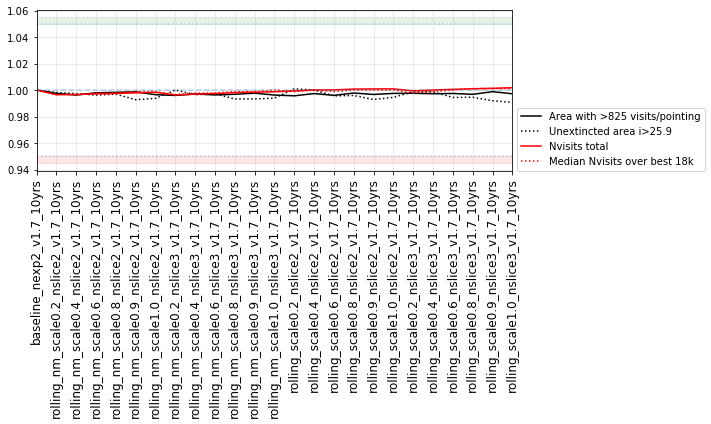

In [25]:
families.plot_areaNvis('rolling')

<a id="mini-surveys"></a>
<a href="#top">Back to top</a>

## Variations adding mini-mini-surveys

<a id="twilight_neo"></a>

In [26]:
families.family_info('twilight_neo')

**twilight_neo** = explore the impact of adding a twilight NEO survey, operating on various timescales and thus requiring varying fraction of survey time. These twilight NEO surveys replace the set initially released in  v1.5, improving the twilight NEO mini-survey performance for NEOs by restricting visits to low solar elongations. Twilight NEO visits are 1 second long, in r,i, and z filters.

Comparison run: baseline_nexp2_v1.7_10yrs


,Area with >825 visits/pointing,Unextincted area i>25.9,Nvisits total,Median Nvisits over best 18k,Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band,Briefly
twi_neo_pattern1_v1.7_10yrs,344.949688,14807.657782,3013478.0,770.0,50.0,67.0,271.0,273.0,247.0,156.0,On every night
twi_neo_pattern2_v1.7_10yrs,10190.703440,15061.963757,2530695.0,829.0,52.0,73.0,202.0,206.0,180.0,168.0,On every other night
twi_neo_pattern3_v1.7_10yrs,14904.176552,15103.928439,2369992.0,849.0,53.0,75.0,198.0,198.0,177.0,172.0,On every third night
twi_neo_pattern4_v1.7_10yrs,16471.977081,15122.392899,2280826.0,859.0,53.0,75.0,197.0,197.5,177.0,174.0,On every fourth night
twi_neo_pattern5_v1.7_10yrs,10011.933894,15063.642344,2533291.0,828.0,52.0,73.0,204.0,203.0,179.0,168.0,"On for 4 nights, off for 4 nights"
twi_neo_pattern6_v1.7_10yrs,12067.364031,15036.784948,2470434.0,836.0,52.0,74.0,199.0,200.0,177.0,169.0,"On for 3 nights, off for 4 nights"
twi_neo_pattern7_v1.7_10yrs,14768.210981,15088.821154,2367226.0,848.0,53.0,75.0,197.0,199.0,176.0,172.0,"On for 2 nights, off for 4 nights"
baseline_nexp2_v1.7_10yrs,17982.705642,15174.429105,2045493.0,888.0,55.0,79.0,189.0,190.0,170.0,180.0,Baseline (none)


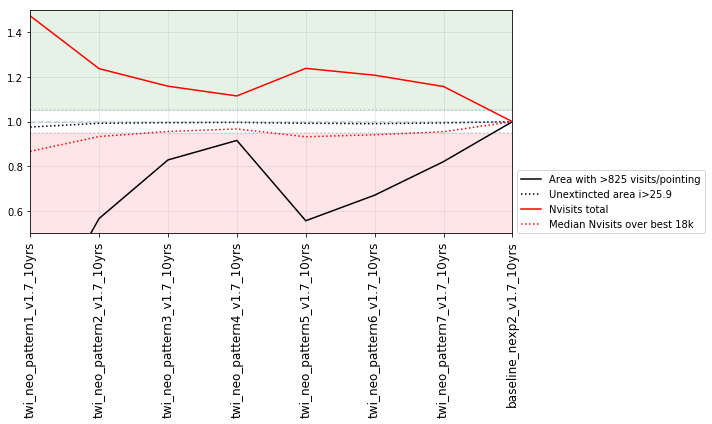

In [27]:
families.plot_areaNvis('twilight_neo')

<a id="shortexp"></a>

In [28]:
families.family_info('shortexp')

**shortexp** = explore the impact of adding 2 or 5 short exposures of 1 or 5 seconds each year (in all 6 filters). The number of visits in the entire survey increases -- but some will be too short to be useful for some science -- the amount of time used for the mini-survey varies in each of these examples, from 0.5% to 5%.

Comparison run: baseline_v1.5_10yrs


,Area with >825 visits/pointing,Unextincted area i>25.9,Nvisits total,Median Nvisits over best 18k,Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band,Briefly
short_exp_2ns_1expt_v1.5_10yrs,18170.707419,15252.483414,2536392.0,967.0,69.0,98.0,234.0,236.0,210.0,221.0,2/yr x 1s
short_exp_2ns_5expt_v1.5_10yrs,18143.010729,15248.286946,2499195.0,951.0,68.0,96.0,230.0,232.0,207.0,218.0,2/yr x 5s
short_exp_5ns_1expt_v1.5_10yrs,18093.492403,15215.554494,2905483.0,950.0,82.0,113.0,268.0,270.0,241.0,253.0,5/yr x 1s
short_exp_5ns_5expt_v1.5_10yrs,18045.652666,15194.572153,2821221.0,914.0,80.0,110.0,260.0,262.0,233.0,245.0,5/yr x 5s
baseline_v1.5_10yrs,18217.707863,15236.536835,2224095.0,967.0,60.0,86.0,205.0,207.0,185.0,195.0,Baseline (none)


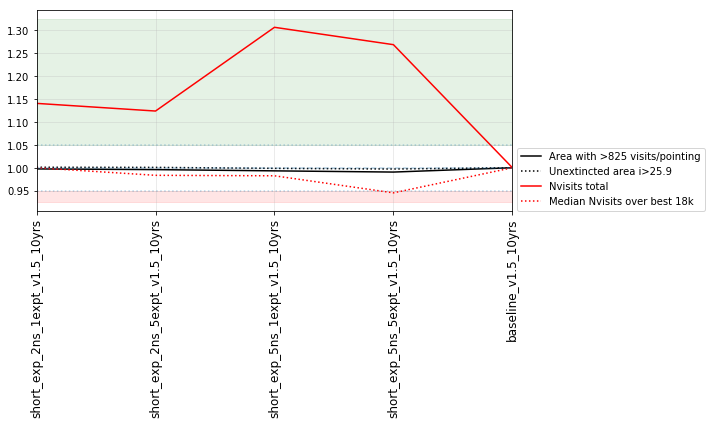

In [29]:
families.plot_areaNvis('shortexp')

<a id="dcr"></a>

In [30]:
families.family_info('dcr')

**dcr** = explore the impact of adding 1 or 2 high-airmass visits in various bandpasses each year, for the purpose of better-measuring differential chromatic refraction (helping with AGN redshifts and the creation of difference image templates). 

Comparison run: baseline_v1.5_10yrs


,Area with >825 visits/pointing,Unextincted area i>25.9,Nvisits total,Median Nvisits over best 18k,Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band,Briefly
dcr_nham1_ug_v1.5_10yrs,18205.957752,15265.912113,2221048.0,965.0,61.0,87.0,205.0,206.0,184.0,195.0,1/yr in ug
dcr_nham1_ugr_v1.5_10yrs,18208.475633,15228.143899,2222321.0,967.0,62.0,87.0,206.0,206.0,184.0,195.0,1/yr in ugr
dcr_nham1_ugri_v1.5_10yrs,18194.207641,15159.321820,2223260.0,967.0,62.0,87.0,205.0,207.0,184.0,195.0,1/yr in ugri
dcr_nham2_ug_v1.5_10yrs,18203.439871,15270.108581,2223585.0,968.0,64.0,87.0,204.0,206.0,184.0,195.0,2/yr in ug
dcr_nham2_ugr_v1.5_10yrs,18205.957752,15214.715200,2224613.0,968.0,63.0,87.0,206.0,205.0,184.0,194.0,2/yr in ugr
dcr_nham2_ugri_v1.5_10yrs,18205.957752,15072.874574,2228175.0,970.0,63.0,88.0,205.0,208.0,183.0,195.0,2/yr in ugri
baseline_v1.5_10yrs,18217.707863,15236.536835,2224095.0,967.0,60.0,86.0,205.0,207.0,185.0,195.0,Baseline (none)


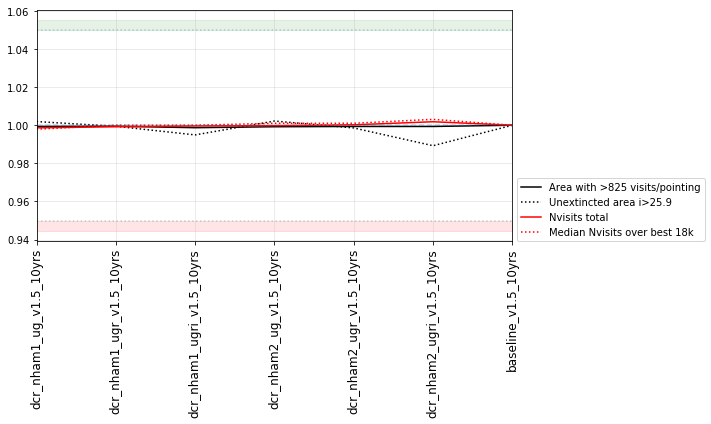

In [31]:
families.plot_areaNvis('dcr')

<a id="good_seeing"></a>

In [32]:
families.family_info('good_seeing')

**good_seeing** = explore the effect of prioritizing achieving at least 1 'good seeing' image in the specified bandpasses in each year. These simulations do improve the seeing distributions in the targeted bands, compared to baseline -- this improvement is most visible when comparing the achieved IQ against the standard baseline, within a given year. 

Comparison run: baseline_v1.5_10yrs


,Area with >825 visits/pointing,Unextincted area i>25.9,Nvisits total,Median Nvisits over best 18k,Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band,Briefly
goodseeing_i_v1.5_10yrs,18214.350688,15387.609691,2223458.0,966.0,59.0,86.0,205.0,208.0,185.0,195.0,good i band
goodseeing_gi_v1.5_10yrs,18216.029276,15261.715645,2222656.0,966.0,59.0,86.0,205.0,207.0,184.0,195.0,good gi bands
goodseeing_gz_v1.5_10yrs,18204.279165,15255.001295,2221935.0,965.0,60.0,86.0,205.0,206.0,185.0,195.0,good gz bands
goodseeing_gri_v1.5_10yrs,18215.189982,15258.358470,2222762.0,966.0,60.0,86.0,205.0,207.0,184.0,195.0,good gri bands
goodseeing_griz_v1.5_10yrs,18207.636339,15222.268843,2219988.0,964.0,60.0,86.0,205.0,206.0,185.0,195.0,good griz bands
baseline_v1.5_10yrs,18217.707863,15236.536835,2224095.0,967.0,60.0,86.0,205.0,207.0,185.0,195.0,baseline - none


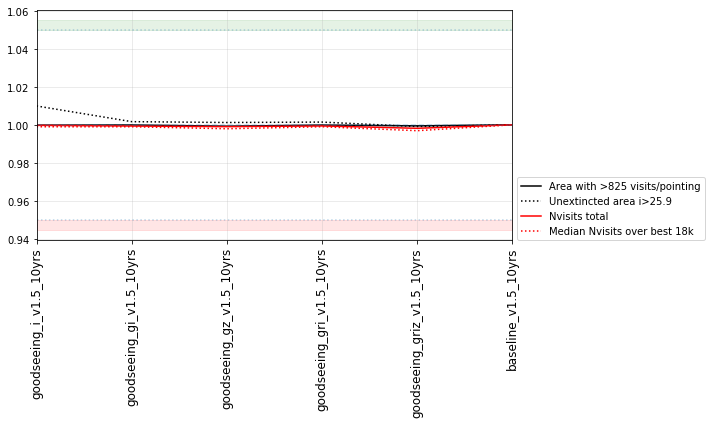

In [33]:
families.plot_areaNvis('good_seeing')

<a id="spiders"></a>

In [34]:
families.family_info('spiders')

**spiders** = This example simulation explores rotating the camera so that diffraction spikes are aligned with the X/Y directions of the CCD, to reduce artifacts in difference imaging.

Comparison run: baseline_v1.5_10yrs


,Area with >825 visits/pointing,Unextincted area i>25.9,Nvisits total,Median Nvisits over best 18k,Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band,Briefly
spiders_v1.5_10yrs,18221.904331,15244.929772,2228766.0,969.0,60.0,86.0,206.0,207.0,186.0,196.0,Spiders Aligned
baseline_v1.5_10yrs,18217.707863,15236.536835,2224095.0,967.0,60.0,86.0,205.0,207.0,185.0,195.0,Random orientation


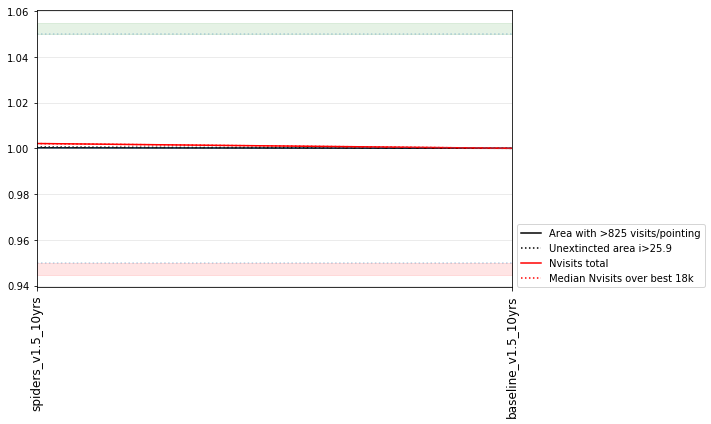

In [35]:
families.plot_areaNvis('spiders')

<a id="DDF variations"></a>
<a href="#top">Back to top</a>

## Variations on the DDFs

<a id="ddf"></a>

In [36]:
families.family_info('ddf')

**ddf** = Vary the sequences for DDF fields. The amount of time per DDF field varies between some of these simulations.

Comparison run: baseline_v1.5_10yrs


,Area with >825 visits/pointing,Unextincted area i>25.9,Nvisits total,Median Nvisits over best 18k,Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band,Briefly
agnddf_v1.5_10yrs,18200.082696,15261.715645,2180601.0,960.0,61.0,86.0,205.0,205.0,183.0,193.0,AGN sequences
descddf_v1.5_10yrs,18183.296823,15235.697542,2190067.0,952.0,59.0,85.0,203.0,203.0,182.0,192.0,DESC sequences
daily_ddf_v1.5_10yrs,18143.850022,15181.143455,2140016.0,920.0,57.0,82.0,196.0,197.0,175.0,186.0,Daily sequences
baseline_v1.5_10yrs,18217.707863,15236.536835,2224095.0,967.0,60.0,86.0,205.0,207.0,185.0,195.0,Baseline


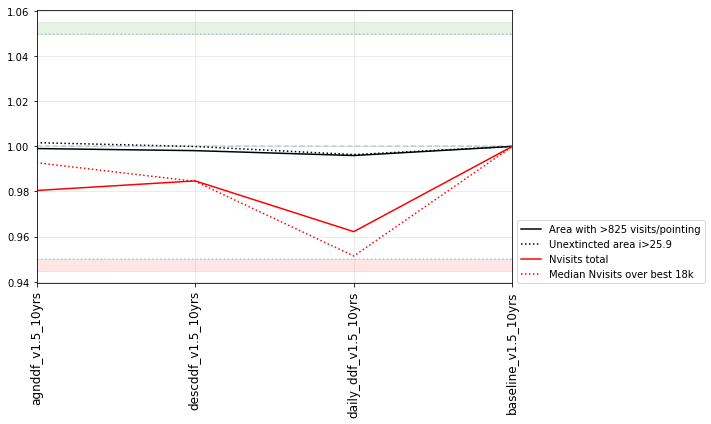

In [37]:
families.plot_areaNvis('ddf')

<a id="ddf_dithers"></a>

In [38]:
families.family_info('ddf_dithers')

**ddf_dithers** = Vary the translational dither offsets in the DDFs, from 0 to 2.0 degrees. Smaller dithers will help the overall depth and uniformity, but larger dithers may be needed for calibration.

Comparison run: baseline_nexp2_v1.7_10yrs


,Area with >825 visits/pointing,Unextincted area i>25.9,Nvisits total,Median Nvisits over best 18k,Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band,Briefly
ddf_dither0.00_v1.7_10yrs,17978.509174,15155.125352,2044791.0,888.0,55.0,78.0,189.0,190.0,170.0,180.0,0 dither
ddf_dither0.05_v1.7_10yrs,17975.151999,15146.732415,2045197.0,888.0,55.0,78.0,189.0,190.0,170.0,180.0,0.05 deg dither
ddf_dither0.10_v1.7_10yrs,17989.419991,15163.518288,2045269.0,888.0,55.0,79.0,189.0,190.0,170.0,180.0,0.10 deg dither
ddf_dither0.30_v1.7_10yrs,17964.241182,15162.678994,2044754.0,888.0,55.0,79.0,189.0,190.0,170.0,180.0,0.30 deg dither
ddf_dither0.70_v1.7_10yrs,17982.705642,15174.429105,2045493.0,888.0,55.0,79.0,189.0,190.0,170.0,180.0,0.70 deg dither
ddf_dither1.00_v1.7_10yrs,17967.598357,15178.625574,2045215.0,889.0,55.0,78.0,189.0,190.0,170.0,180.0,1.00 deg dither
ddf_dither1.50_v1.7_10yrs,17976.830587,15172.750518,2044966.0,888.0,55.0,79.0,189.0,190.0,170.0,180.0,1.50 deg dither
ddf_dither2.00_v1.7_10yrs,17975.991293,15184.500629,2044346.0,889.0,55.0,79.0,189.0,190.0,170.0,180.0,2.00 deg dither
baseline_nexp2_v1.7_10yrs,17982.705642,15174.429105,2045493.0,888.0,55.0,79.0,189.0,190.0,170.0,180.0,Baseline (0.70 deg)


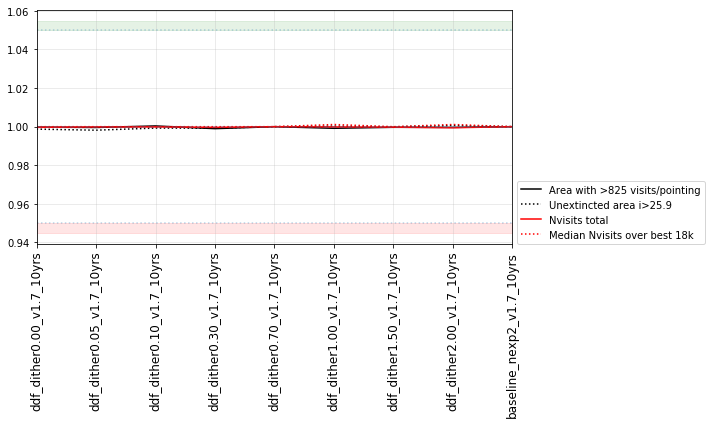

In [39]:
families.plot_areaNvis('ddf_dithers')

<a id="euclid_dithers"></a>

In [40]:
families.family_info('euclid_dithers')

**euclid_dithers** = vary the translational dither offsets to fill in the Euclid DDF footprint, as the Euclid field is a double pointing for Rubin. These simulation vary the spatial dither both towards the second pointing and perpendicular to the second pointing. The perpendicular dithering is relatively small (and symmetric 'up' and 'down'). The dithering along the footprint ('direct') is larger and non-symmetric, with a smaller dither 'away' from the second pointing and a larger dither 'toward' the second pointing. (offsets are in degrees).

Comparison run: baseline_nexp2_v1.7_10yrs


,Area with >825 visits/pointing,Unextincted area i>25.9,Nvisits total,Median Nvisits over best 18k,Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band,Briefly
euclid_dither1_v1.7_10yrs,17982.705642,15174.429105,2045493.0,888.0,55.0,79.0,189.0,190.0,170.0,180.0,"Direct -0.25/+1.0, Perp +/-0.25 (deg)"
euclid_dither2_v1.7_10yrs,17970.116238,15192.054272,2044663.0,888.0,55.0,78.0,189.0,190.0,170.0,180.0,"Direct -0.1/+1.0, Perp +/-0.25 (deg)"
euclid_dither3_v1.7_10yrs,17967.598357,15161.839701,2045144.0,888.0,55.0,78.0,189.0,190.0,170.0,180.0,"Direct -0.25/+1.0, Perp +/-0.10 (deg)"
euclid_dither4_v1.7_10yrs,18012.080920,15189.536391,2045203.0,888.0,55.0,78.0,189.0,190.0,170.0,180.0,"Direct -0.25/+1.5, Perp +/-0.25 (deg)"
euclid_dither5_v1.7_10yrs,17980.187761,15170.232637,2045118.0,888.0,55.0,78.0,189.0,190.0,170.0,180.0,"Direct -0.25/+0.75, Perp +/-0.25 (deg"
baseline_nexp2_v1.7_10yrs,17982.705642,15174.429105,2045493.0,888.0,55.0,79.0,189.0,190.0,170.0,180.0,Baseline (random)


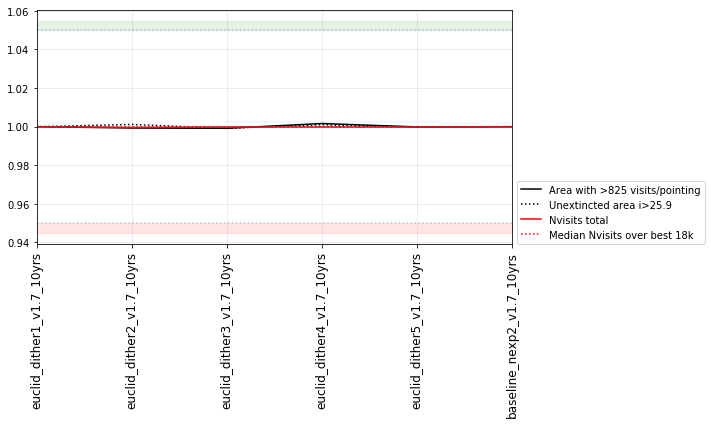

In [41]:
families.plot_areaNvis('euclid_dithers')

<a id="potential schedulers"></a>
<a href="#top">Back to top</a>

## Examples of combinations of survey strategy variations

<a id="potential_schedulers"></a>

In [42]:
families.family_info('potential_schedulers')

**potential_schedulers** = A series of simulations where we vary *multiple* survey strategies at once, trying to combine the survey strategies that seemed useful to us (at the time anyway) to reach a particular science goal. These simulations are like cross-sections of the families, using bits and pieces to try to reach goals, rather than explore the impact of the various survey strategy changes individually. Each simulation is repeated for 2x15s visits and for 1x30s visits. <br>
The point here is to illustrate the effect of combinations of survey strategy variations; some are successful and sometimes we may meet technical goals but not science goals. For further details on each simulation, Section 5 in the cadence report for the SCOC (https://pstn-051.lsst.io/) is recommended. 

Comparison run: baseline_nexp1_v1.6_10yrs


,Area with >825 visits/pointing,Unextincted area i>25.9,Nvisits total,Median Nvisits over best 18k,Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band,Briefly
barebones_nexp2_v1.6_10yrs,18405.709639,15279.340811,2142145.0,1067.0,68.0,100.0,232.0,233.0,211.0,213.0,WFD only 2x15s
barebones_v1.6_10yrs,18518.174988,15328.019842,2317532.0,1155.0,74.0,109.0,251.0,252.0,228.0,230.0,WFD only 1x30s
baseline_nexp2_scaleddown_v1.6_10yrs,18138.814260,15187.857804,2064957.0,925.0,56.0,81.0,197.0,198.0,178.0,188.0,Baseline 2x15s adjusted WFD fraction
baseline_nexp2_v1.6_10yrs,18044.813372,15169.393344,2064854.0,897.0,55.0,79.0,191.0,191.0,172.0,182.0,Baseline 2x15s
baseline_nexp1_v1.6_10yrs,18210.154220,15328.859136,2232205.0,972.0,60.0,86.0,207.0,208.0,186.0,197.0,Baseline 1x30s
combo_dust_nexp2_v1.6_10yrs,7022.369929,17063.679101,2069774.0,817.0,50.0,70.0,171.0,172.0,156.0,166.0,Combo dust 2x15s
combo_dust_v1.6_10yrs,19157.716746,17702.381565,2237663.0,885.0,53.0,76.0,186.0,187.0,170.0,180.0,Combo dust 1x30s
ddf_heavy_nexp2_v1.6_10yrs,5404.211782,14769.889568,2066665.0,810.0,50.0,70.0,171.0,173.0,155.0,165.0,DDF 13.4 % 2x15s
ddf_heavy_v1.6_10yrs,17677.202755,15094.696209,2232115.0,881.0,54.0,77.0,187.0,188.0,169.0,179.0,DDF 13.4% 1x30s
dm_heavy_nexp2_v1.6_10yrs,18076.706531,15146.732415,2067057.0,899.0,58.0,80.0,192.0,191.0,170.0,181.0,DM heavy 2x15s


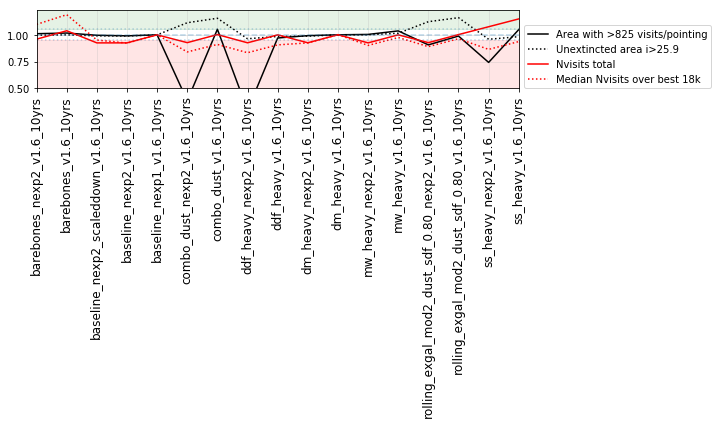

In [43]:
families.plot_areaNvis('potential_schedulers')